# Car Sales Prediction Model


### Install requirements.txt

In [83]:
!pip install -r requirements.txt

### Import necessary libraries

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

## *Step 1: Load and Preview the Data*

### Load the dataset (adjust file path if needed)

In [45]:
df = pd.read_csv('car_purchasing.csv', encoding='latin1')

### Show basic info

In [46]:
df.shape

(500, 9)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


### Preview the first few rows

In [48]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


## *Step 2: EDA — Summary Stats, Correlation*

In [49]:
# Summary statistics
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


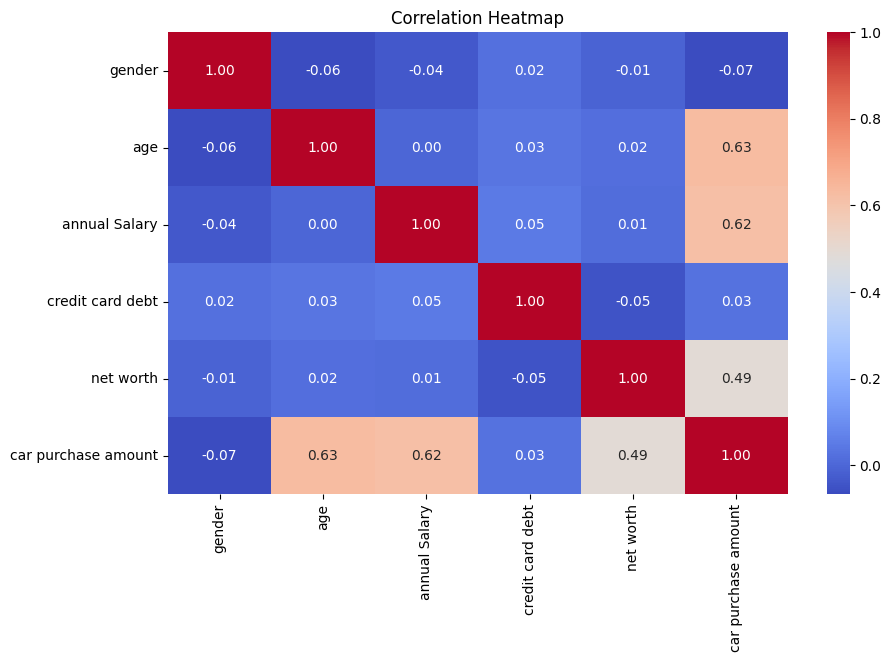

In [50]:
# Correlation heatmap (numeric features only)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## *Step 3: Visualizing Feature vs. Target Relationships*

### Scatter plots: Feature vs Car Purchase Amount

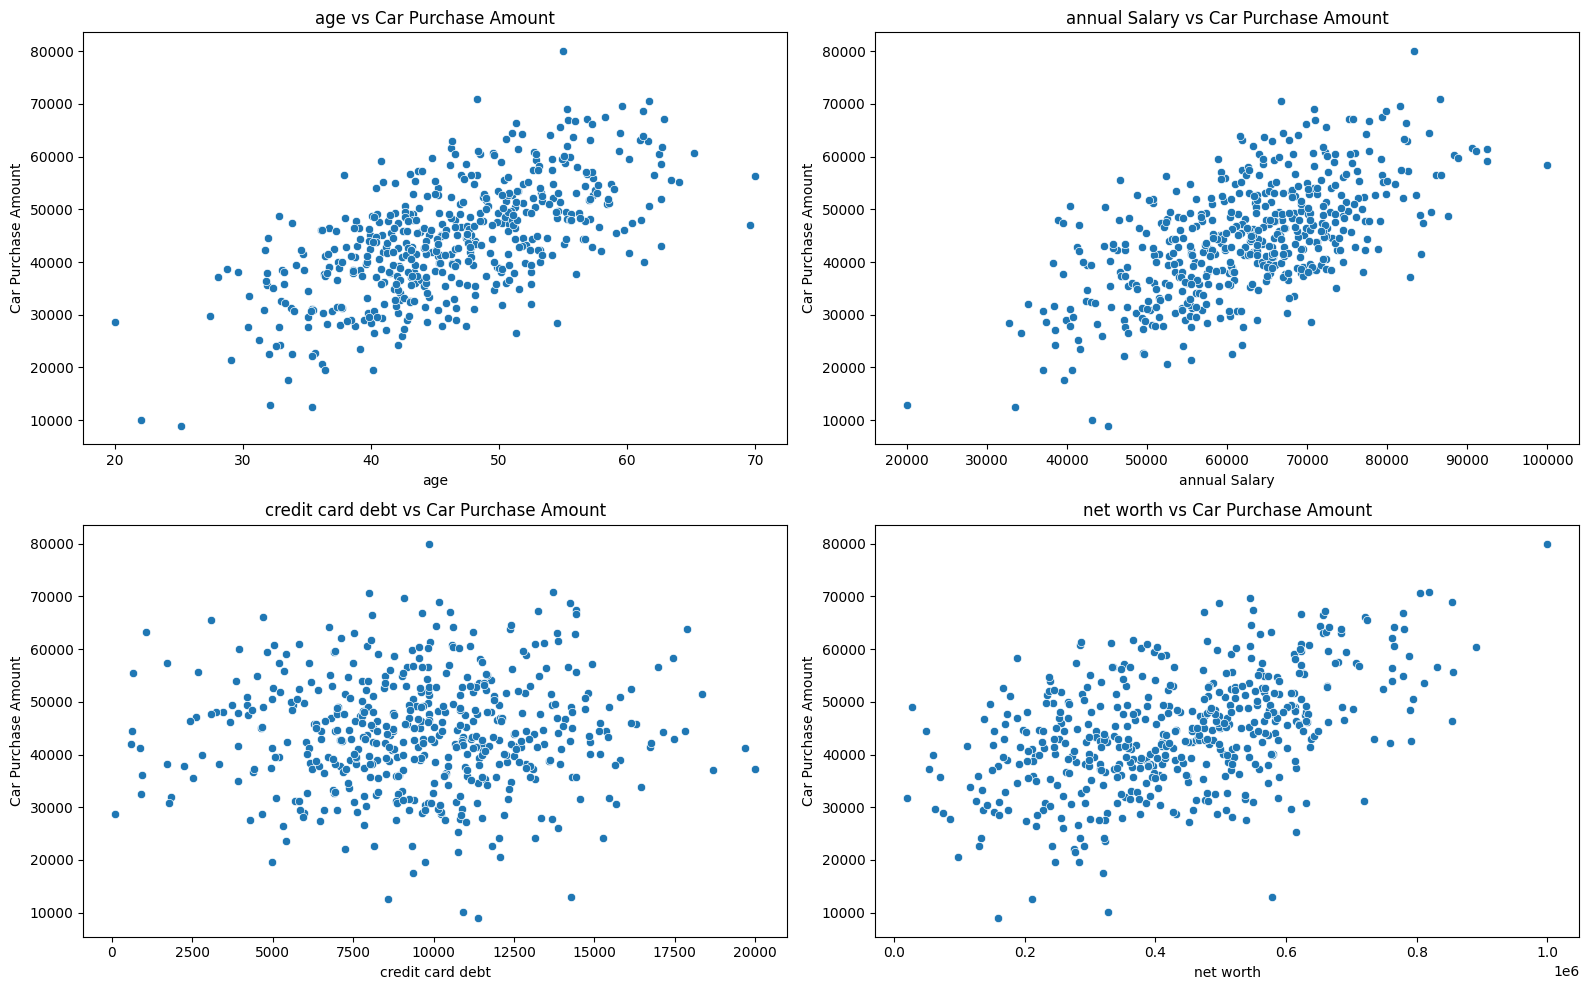

In [51]:

features = ['age', 'annual Salary', 'credit card debt', 'net worth']

plt.figure(figsize=(16, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[feature], y=df['car purchase amount'])
    plt.title(f'{feature} vs Car Purchase Amount')
    plt.xlabel(feature)
    plt.ylabel('Car Purchase Amount')

plt.tight_layout()
plt.show()


### Distribution plot of car purchase amount



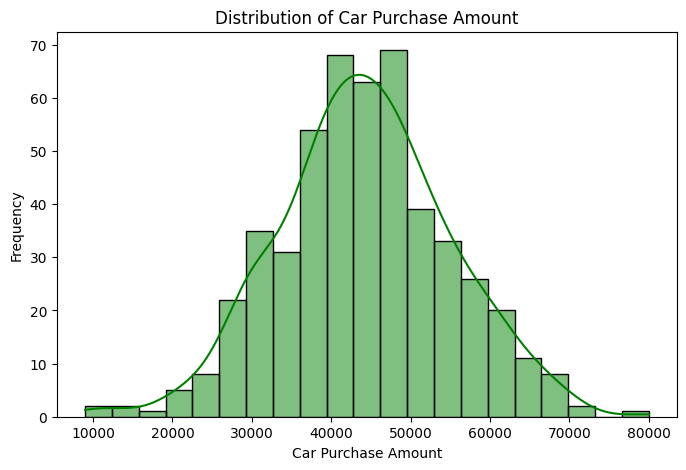

In [52]:
plt.figure(figsize=(8, 5))
sns.histplot(df['car purchase amount'], kde=True, color='green')
plt.title('Distribution of Car Purchase Amount')
plt.xlabel('Car Purchase Amount')
plt.ylabel('Frequency')
plt.show()

### Boxplots to check outliers

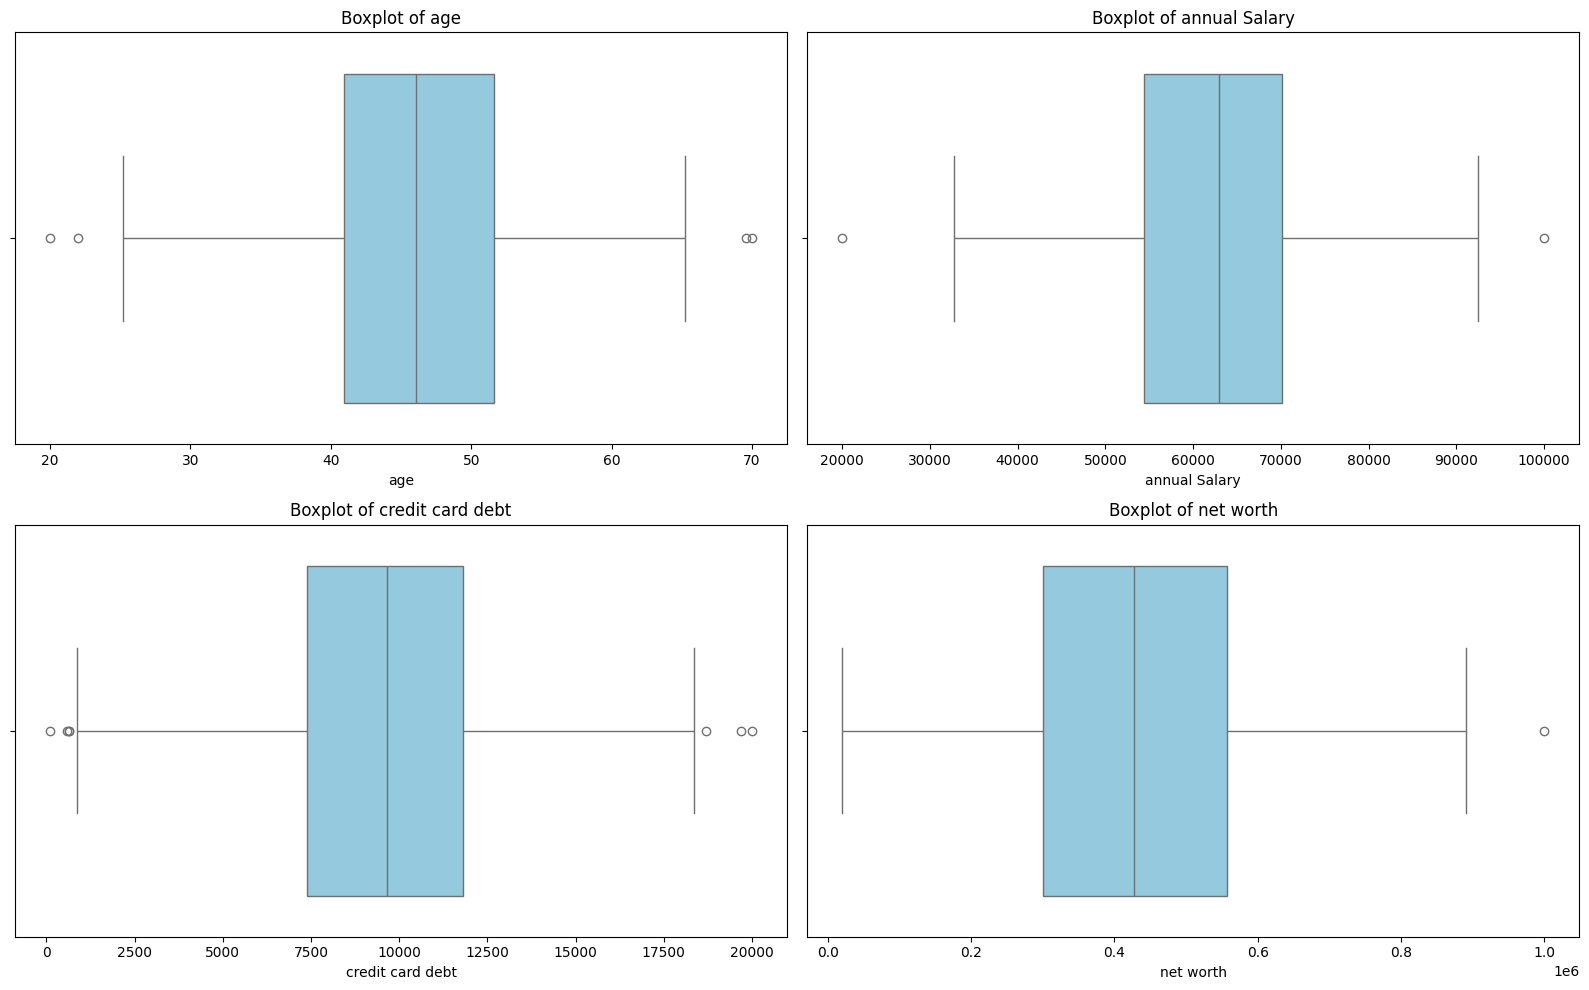

In [53]:
plt.figure(figsize=(16, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

### Pairplot



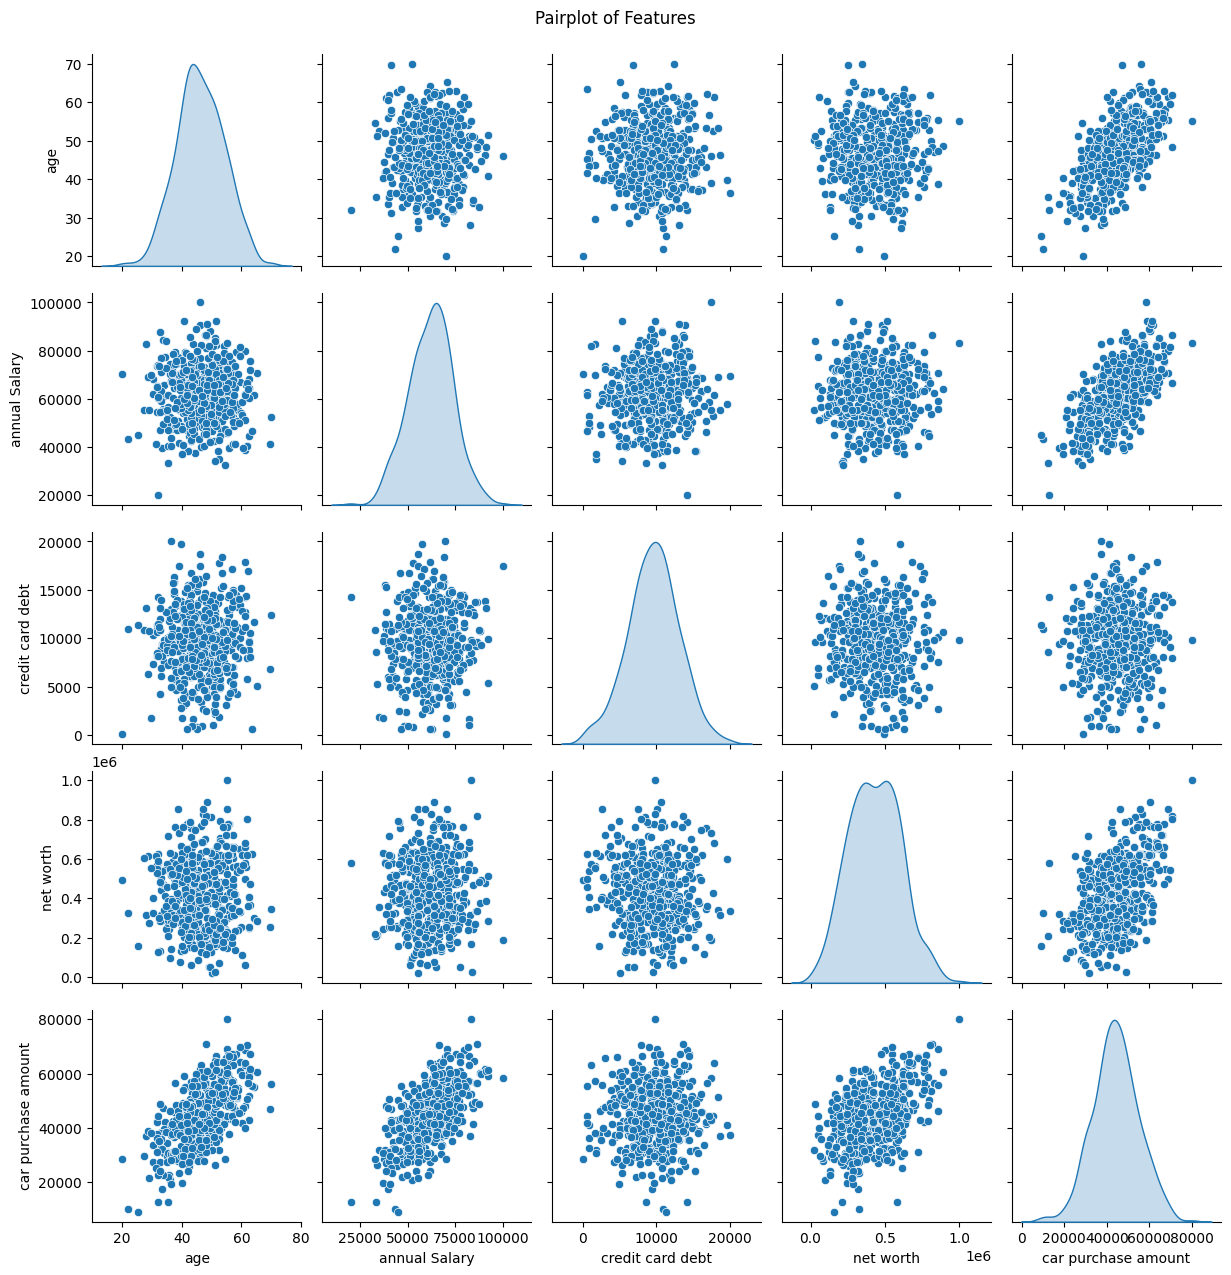

In [54]:
sns.pairplot(df[['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']], diag_kind='kde')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

## *Step 4: Data Preprocessing*

### Remove Unnecessary Columns i.e. 'customer name' and 'customer e-mail'

In [55]:
df = df.drop(columns=['customer name', 'customer e-mail'])

# Verify that the columns have been removed
print("Data after removing 'customer name' and 'customer e-mail' columns:")
print(df.head())

Data after removing 'customer name' and 'customer e-mail' columns:
        country  gender        age  annual Salary  credit card debt  \
0      Bulgaria       0  41.851720    62812.09301      11609.380910   
1        Belize       0  40.870623    66646.89292       9572.957136   
2       Algeria       1  43.152897    53798.55112      11160.355060   
3  Cook Islands       1  58.271369    79370.03798      14426.164850   
4        Brazil       1  57.313749    59729.15130       5358.712177   

     net worth  car purchase amount  
0  238961.2505          35321.45877  
1  530973.9078          45115.52566  
2  638467.1773          42925.70921  
3  548599.0524          67422.36313  
4  560304.0671          55915.46248  


### Handling Missing Values

In [56]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display percentage of missing values for each column
missing_percentage = (missing_values / df.shape[0]) * 100
print("Missing values per column (in percentage):")
print(missing_percentage)

# 1: Drop rows with missing target values (car purchase amount)
df = df.dropna(subset=['car purchase amount'])

# 2: Impute missing values for numerical columns with the median
df['age'] = df['age'].fillna(df['age'].median())
df['annual Salary'] = df['annual Salary'].fillna(df['annual Salary'].median())
df['credit card debt'] = df['credit card debt'].fillna(df['credit card debt'].median())
df['net worth'] = df['net worth'].fillna(df['net worth'].median())

# 3: Impute missing values for categorical columns with the mode (most frequent value)
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

# Check if there are any remaining missing values
print(df.isnull().sum())


Missing values per column (in percentage):
country                0.0
gender                 0.0
age                    0.0
annual Salary          0.0
credit card debt       0.0
net worth              0.0
car purchase amount    0.0
dtype: float64
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64


### Outlier Detection and Removal (Using IQR)

Detected Outliers:
                 country  gender        age  annual Salary  credit card debt  \
28               Denmark       1  46.124036   100000.00000      17452.921790   
37                Turkey       1  22.000387    43131.78411      10917.140940   
89              Suriname       1  32.094081    20000.00000      14261.807730   
194                Haiti       0  70.000000    52323.24480      12438.856480   
221              Andorra       1  36.408033    69494.69783      20000.000000   
236             Viet Nam       1  69.569306    41434.51258       6810.555606   
239              Bahrain       1  45.138518    62939.12851        632.052852   
253     Christmas Island       1  46.205241    55434.04046      18693.146520   
270              Bolivia       0  35.375156    33422.99683       8570.611562   
290              Croatia       0  63.414531    46549.16329        640.045378   
315              Namibia       1  55.017566    83333.81054       9874.075327   
440              Urug

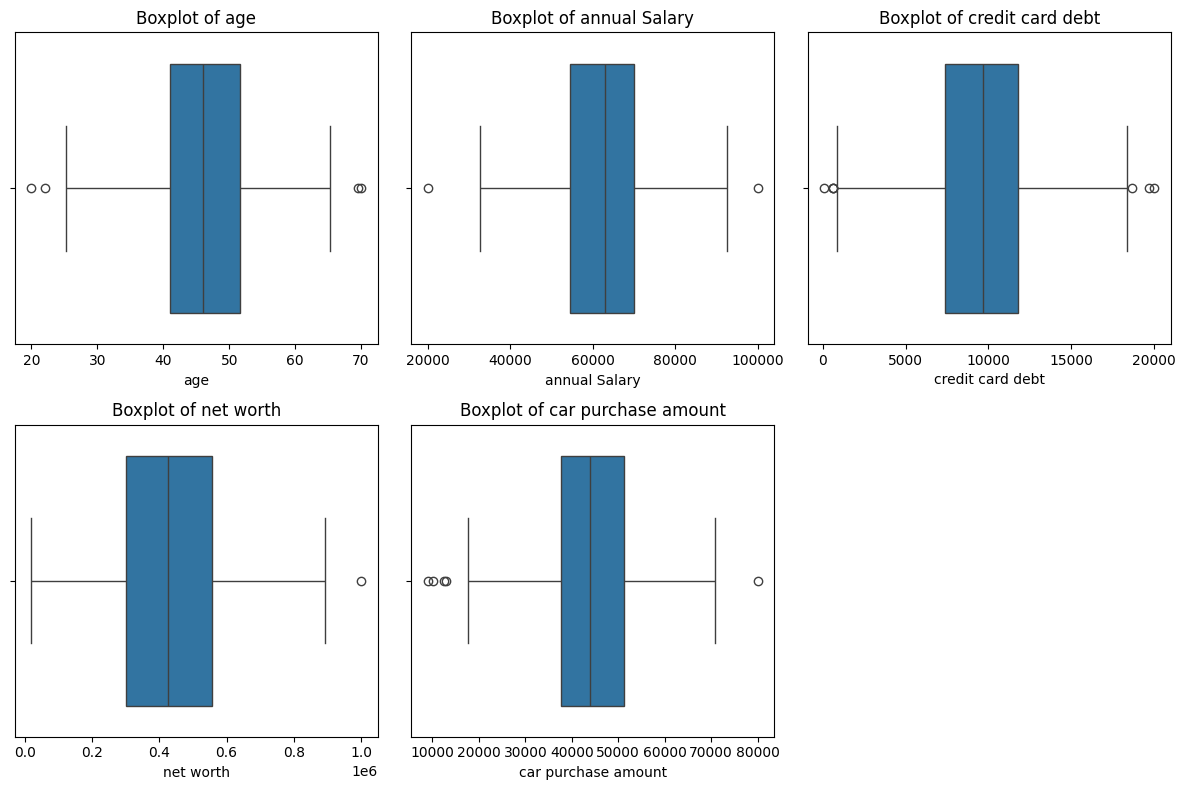

In [57]:
# Calculate IQR for each numerical column
Q1 = df[['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']].quantile(0.25)
Q3 = df[['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds to filter out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df[['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']] < lower_bound) | \
           (df[['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']] > upper_bound)

# Get the rows that have outliers
outlier_rows = df[outliers.any(axis=1)]

# Get the rows without outliers
df_no_outliers = df[~outliers.any(axis=1)]

# Display the detected outliers
print("Detected Outliers:")
print(outlier_rows)

# Visualize the outliers
# Plot boxplots to show outliers for each feature
plt.figure(figsize=(12, 8))

features = ['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

### Feature Scaling



In [58]:
# Initialize the scaler (standardization: mean=0, std=1)
scaler = StandardScaler()

# Select numerical columns to scale
numerical_cols = ['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']

# Apply scaling to the selected columns
df_scaled = df_no_outliers.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_no_outliers[numerical_cols])

# Check the first few rows of the scaled dataset
df_scaled.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,-0.589305,0.044268,0.607916,-1.120107,-0.881653
1,Belize,0,-0.718237,0.382778,-0.005515,0.577420,0.069783
2,Algeria,1,-0.418308,-0.751386,0.472656,1.202300,-0.142945
3,Cook Islands,1,1.568515,1.505891,1.456414,0.679878,2.236762
4,Brazil,1,1.442667,-0.227873,-1.274969,0.747922,1.118934


### Splitting Data into Training and Test Sets

In [69]:
# Define the target variable and features
X = df_scaled.iloc[:, 1:6]  # Features
y = df_scaled['car purchase amount']  # Target variable

# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (388, 5)
Test data shape: (97, 5)


In [71]:
y_train.head()

,car purchase amount
474,-0.899354
25,-0.000932
225,-1.629277
241,0.237960
368,0.824986


# *Step 5 : Modelling (Applying Multiple Linear Regression)*

Mean Squared Error (MSE): 2.32965294517205e-08
R-squared (R²) Score: 0.9999999726280459


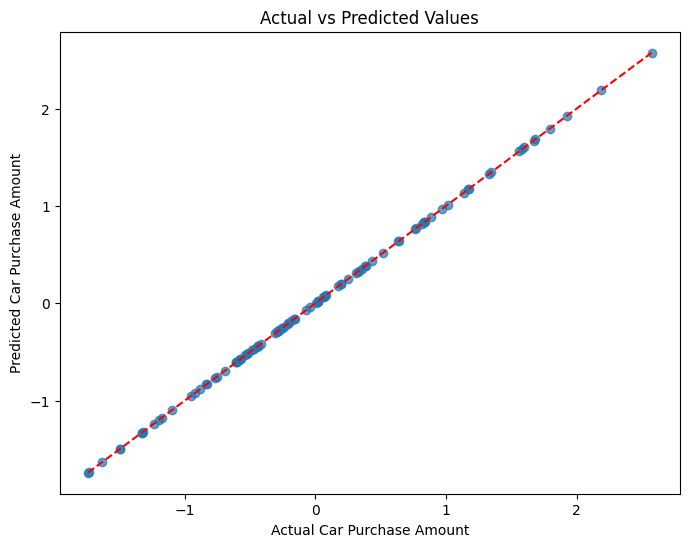

In [72]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²) Score: {r2}")

# Optional: Plotting Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Car Purchase Amount')
plt.ylabel('Predicted Car Purchase Amount')
plt.show()

## *Step 6 Model Comparison*

Model Comparison Results:
                                  MSE  R2 Score
Linear Regression        2.329653e-08  1.000000
Decision Tree Regressor  1.359763e-01  0.840236
Random Forest Regressor  5.143589e-02  0.939566


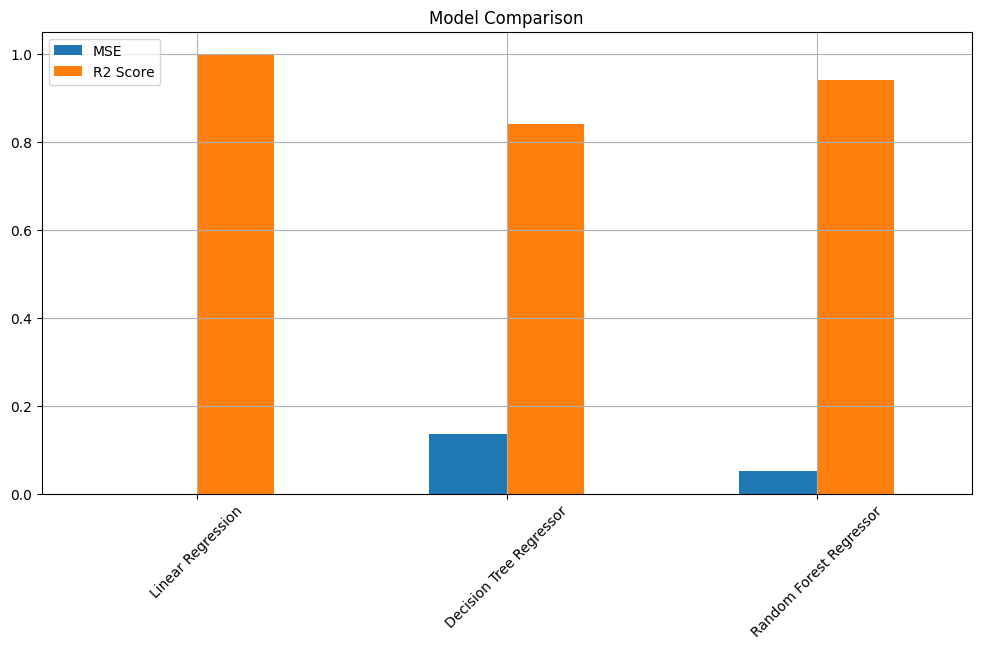

In [74]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42)
}

# Dictionary to store evaluation results
results = {}

# Train, predict and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2 Score': r2}

# Display results
results_df = pd.DataFrame(results).T
print("Model Comparison Results:")
print(results_df)

# Plotting comparison
results_df[['MSE', 'R2 Score']].plot(kind='bar', figsize=(12,6), title='Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Linear Regression is performing extremely well — almost perfect R² = 1 and MSE ≈ 0.
Random Forest is also very good (R² ≈ 0.94), but slightly behind.

Decision Tree performed the worst among the three.

*As of now, **Linear Regression Model** is found to be best applicable model.*

## *Step 7 Saving the Model*

In [75]:
!pip install joblib

In [80]:
joblib.dump(model, 'car_sales_model.pkl')

print("✅ Model saved successfully as 'car_sales_model.pkl'")

✅ Model saved successfully as 'car_sales_model.pkl'
